# Data Analysis and Visualization on crop production data set

In [7]:
#Data Preparation and Cleaning
#for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#for manipulations
import pandas as pd
import numpy as np

#for interactivity
from ipywidgets import interact
%matplotlib inline

In [8]:
#Read the data
data=pd.read_csv("crop.csv")

In [11]:
#check the shape of the data
print("shape of the dataset:", data.shape)

shape of the dataset: (246091, 7)


In [13]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [15]:
#Lets check if there is any missing value present in the dataset
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [17]:
3730/246091

0.015156994770227274

There showing huge number of missing values 3730.
Now dropping these samples as we have sufficiently big dataset. Missing value accounts for only 1.5% of total sample size.

In [19]:
data.dropna(subset=["Production"],axis=0,inplace=True)

By dropping missing values in Production variable we ended up with 242361 sample size.

In [21]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

#Checking for Correlation between variables

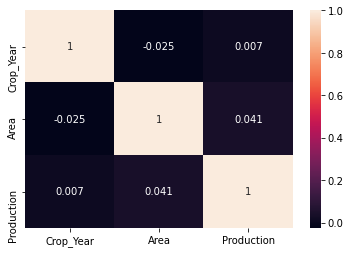

In [23]:
plt.tick_params(labelsize=10)
sns.heatmap(data.corr(),annot=True);

There is no variable showing high correlation with any other variable in the dataset.

#Univarate Analysis
#State Variable

In [24]:
data.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [25]:
data.State_Name.nunique()

33

In [26]:
data.State_Name.value_counts()

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Jharkhand                       1266
Manipur                         1266
Mizoram                          954
P

This dataset encodes agriculture data for 33 Indian states (including Union Territory). DataFrame.value_counts() helps to see the quantum of levels present. As seen below, we have more data from top agriculture rich states like Uttar Pradesh, Madhya Pradesh and Karnatake than other states.

In [27]:
#District Variable
data.District_Name.nunique()

646

In [28]:
data.District_Name.unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [29]:
data.District_Name.value_counts()

TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
RAMGARH        6
KHUNTI         6
MUMBAI         1
NAMSAI         1
Name: District_Name, Length: 646, dtype: int64

On District front, we have have more data coming from Tumkur, Belgaum, Hassan, Bellary and Bijapur from Karantaka state

In [30]:
#Crop Year Variable
print(data.Crop_Year.nunique())
print(data.Crop_Year.min())
print(data.Crop_Year.max())
print(data.Crop_Year.value_counts())

19
1997
2015
2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64


Our Dataset has data for 19 years from 1997 to 2015. Top years are 2003, 2002, 2007–08 and 2006.

Season Variable
Dataset talks of six different seasons i.e. Kharif, Annual, Autumn, Rabi, Summer and Winter crops with more crops yielding in Winter. Frequency wise, we have more data points from Kharif, Rabi and Annual crop types.
Little information about different crops types: The kharif cropping season is from July –October during the south-west monsoon and the Rabi cropping season is from October-March (winter). The crops grown between March and June are summer crops. Crops in India are dependent on Monsoon water. There will be variation in crop production from one year to another.

In [31]:
print(data.Season.nunique())
print(data.Season.unique())
print(data.Season.max())
print(data.Season.value_counts())

6
['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ']
Winter     
Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64


In [32]:
print(data.Crop.nunique())
print(data.Crop.unique())
print(data.Crop.max())
print(data.Crop.value_counts().head(20))

124
['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Mesta' 'Cowpea(Lobia)' 'Lemon' 'Pome Granet'
 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total'
 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple' 'Barley'
 'Sannhamp' 'Khesari' 'Guar seed' 'Mo

Dataset shows data for 124 different crop varieties. On doing df.value_counts(), we can show top crops are Rice(15082),Maize(13787) and Moong(Green Gram, 10106).

In [33]:
#Area Variable: Area under cultivation
print(data.Area.nunique())
print(data.Area.max())
print(data.Area.value_counts().head(10))
print(data.Area.value_counts().tail(10))

38391
8580100.0
1.0      3573
2.0      3140
100.0    2621
3.0      2478
4.0      2182
5.0      2090
6.0      1750
200.0    1671
10.0     1590
7.0      1555
Name: Area, dtype: int64
105415.0    1
42117.0     1
42118.0     1
53154.0     1
60052.0     1
42119.0     1
236004.0    1
168478.0    1
117009.0    1
13950.0     1
Name: Area, dtype: int64


We have proportion of area under cultivation for different states and districts. Production depends on the proportion of area allocated for cultivation.

In [34]:
#Production Variable
data.Production.describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

Production values range from 0 to 1250800000

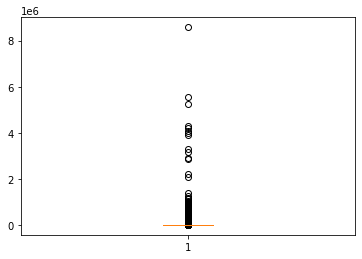

In [35]:
plt.boxplot(data.Area);

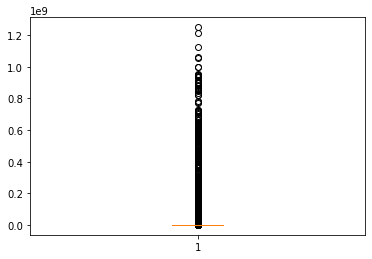

In [36]:
plt.boxplot(data.Production);

Looking at distribution of Area and Production variables. These two variables are highly skewed with lot of outliers.

In [37]:
#BiVarate Analysis
Prod = data.groupby(by = data.State_Name)['Production','State_Name'].sum().reset_index().sort_values(by = 'Production', ascending = False).head(10)
Prod

<ipython-input-37-9b27c6cf2a23>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Prod = data.groupby(by = data.State_Name)['Production','State_Name'].sum().reset_index().sort_values(by = 'Production', ascending = False).head(10)


,State_Name,Production
15,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
27,Tamil Nadu,1.207644e+10
30,Uttar Pradesh,3.234493e+09
3,Assam,2.111752e+09
32,West Bengal,1.397904e+09
17,Maharashtra,1.263641e+09
14,Karnataka,8.634298e+08
0,Andaman and Nicobar Islands,7.182232e+08
24,Punjab,5.863850e+08


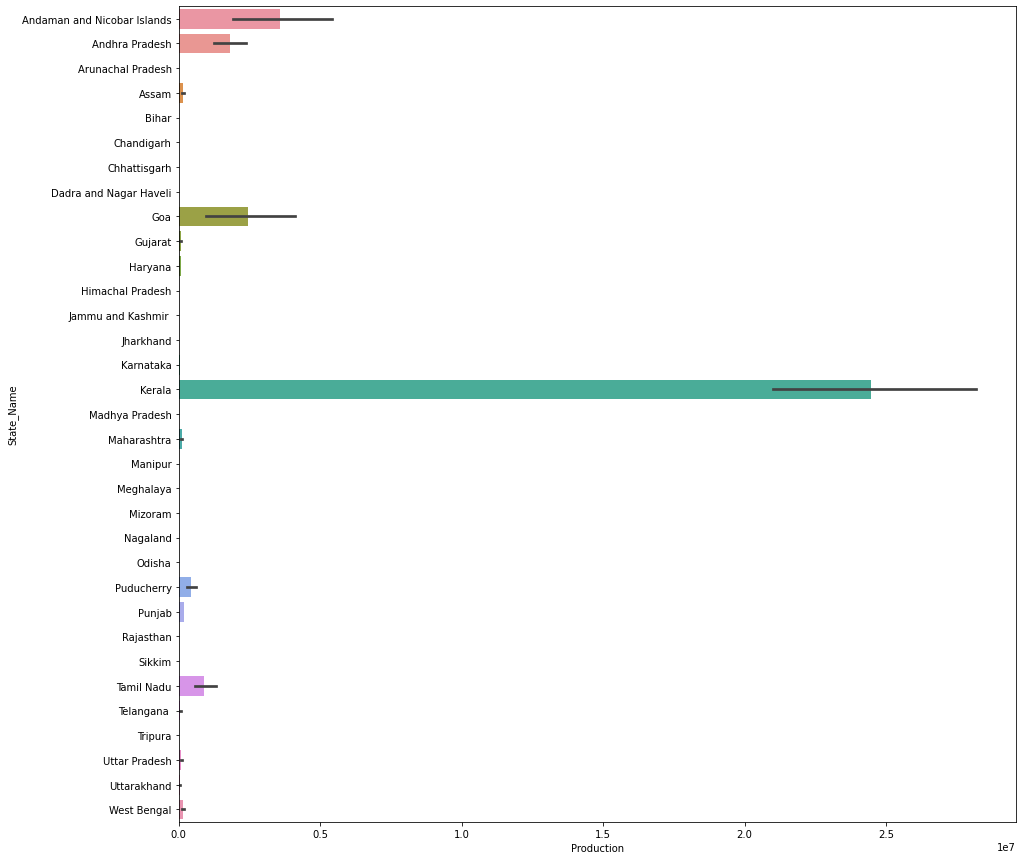

In [38]:
plt.figure(figsize= (15,15))
sns.barplot(x=data['Production'],y= data["State_Name"], orient='h');

Kerala is top state when we look at the quantum of Production for last 19.years

In [39]:
#Exploratory Analysis and Visualization
data.describe()

,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


(array([2.42347e+05, 6.00000e+00, 5.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([1.00000000e-01, 1.71602008e+06, 3.43204006e+06, 5.14806004e+06,
        6.86408002e+06, 8.58010000e+06]),
 <BarContainer object of 5 artists>)

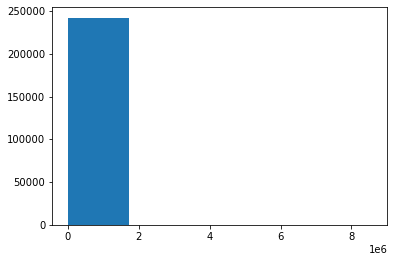

In [40]:
plt.hist(data.Area, bins = 5)

(array([2.42304e+05, 5.70000e+01]),
 array([0.0000e+00, 6.2540e+08, 1.2508e+09]),
 <BarContainer object of 2 artists>)

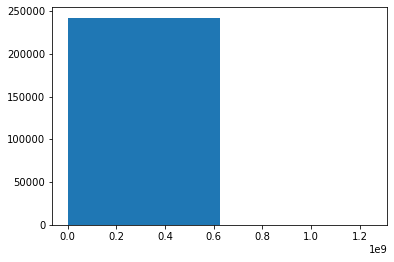

In [41]:
plt.hist(data.Production, bins = 2)

Different zones (Union Terr, South Zone, NE Zone, East Zone, North Zone, Central Zone and West Zone)
Different categories (Cereal, Pulses,Fruits,Beans,Vegetables, Spices, fibers, Nuts, Natural Polymer,Coffee, Tea, Total foodgrain, Pulses, Oilseeds, Paddy, Commercial, Sugarcane, forage plants and Others)

In [52]:
#Zone-Wise Production - 1997-2014
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [54]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

data['Zones'] = data.apply(get_zonal_names, axis=1)
data['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

In [55]:
data.Zones.value_counts()

South Zone      53500
North Zone      49874
East Zone       43261
West Zone       33134
Central Zone    32972
NE Zone         28284
Union Terr       1336
Name: Zones, dtype: int64

Using Zonal information, we can decipher the top zones are South India, North India and East India

In [57]:
crop=data['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

data['cat_crop']=data['Crop'].apply(cat_crop)

In [58]:
data["cat_crop"].value_counts()

Cereal        63283
Pulses        40898
oilseeds      33801
Vegetables    23154
spices        21638
Nuts          11472
Commercial    10561
fibres         9785
Beans          9115
Fruits         6153
Name: cat_crop, dtype: int64

Looking at the new variable cat_crop, top frequency of crop types are Cereal, Pulses and oilseeds.

# Data Visualization

In [59]:
data_explore = data.copy()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Zone-Wise Production: Total')

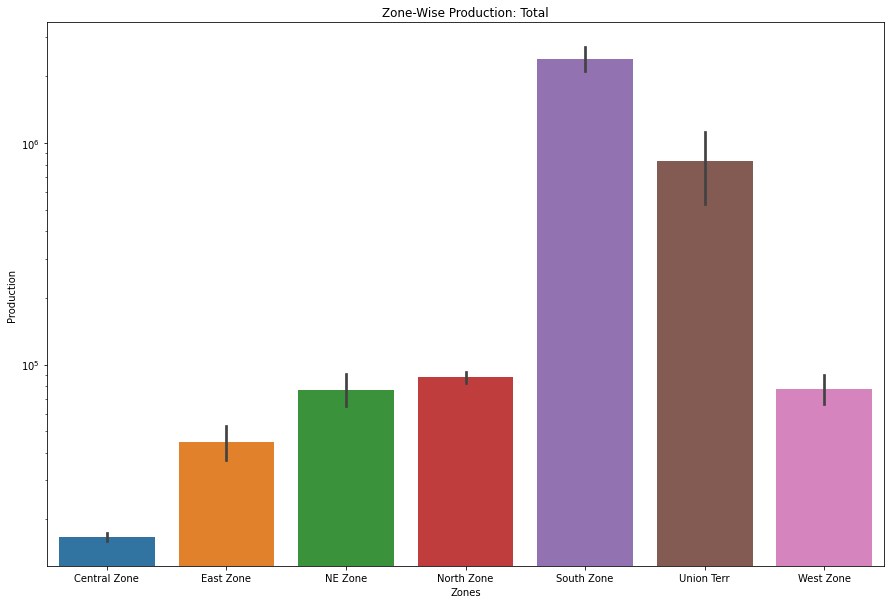

In [60]:
#Zonal distribution of crops
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data_explore.Zones.sort_values(ascending=True), data_explore.Production)
plt.yscale('log')
plt.title('Zone-Wise Production: Total')

Production wise top zone is South India

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Southern-Zone Production')

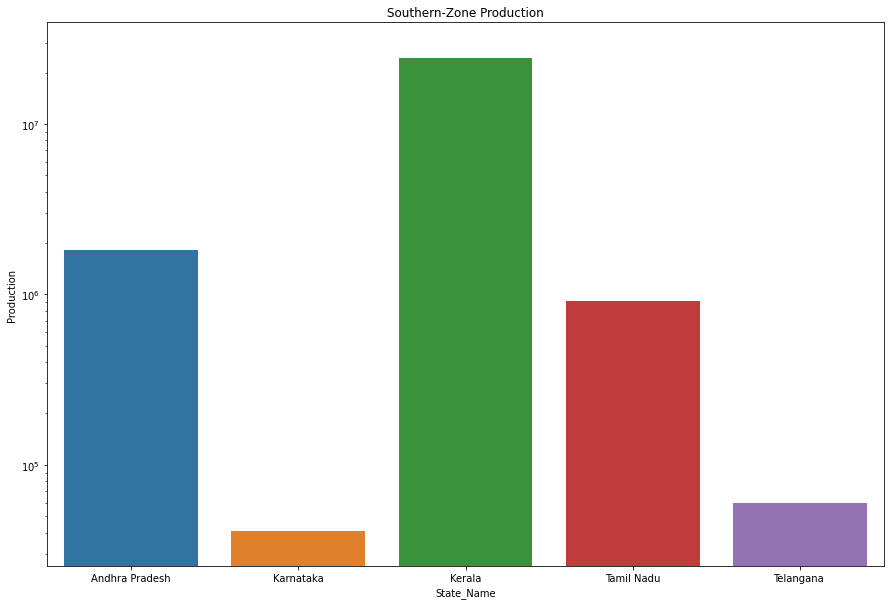

In [61]:
south_zone =  data_explore[(data_explore["Zones"] == 'South Zone')]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(south_zone.State_Name, south_zone.Production,errwidth=0)
plt.yscale('log')
plt.title('Southern-Zone Production')

Top South Indian states are Kerala, Andhra Pradesh and Tamil Nadu

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Overall Crops vs Production')

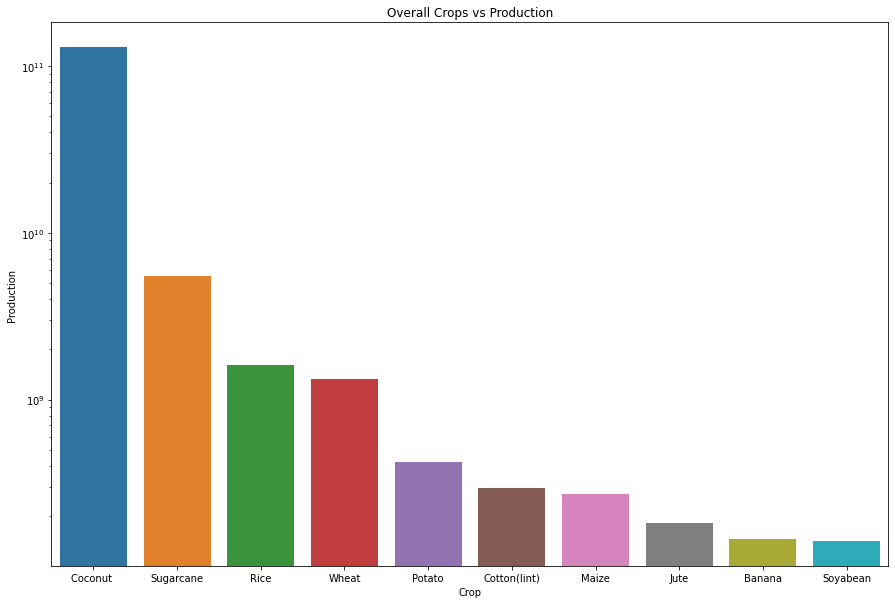

In [62]:
##Crop wise Production status
#Overall Crop Production
crop = data_explore.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
crop 
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(crop.Crop, crop.Production)
plt.yscale('log')
plt.title('Overall Crops vs Production')

Top Crops Production wise are: Coconut, Sugarcane and Rice

<AxesSubplot:xlabel='Crop_Year'>

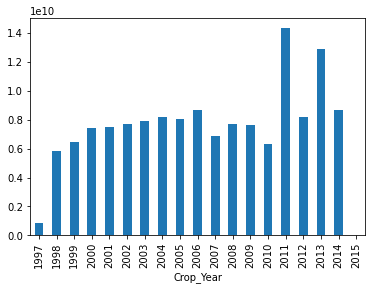

In [63]:
##Yearwise Production Status
plt.tick_params(labelsize=10)
data_explore.groupby("Crop_Year")["Production"].agg("sum").plot.bar()

High productive years are 2011, 2013 and 2014

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Seasonal Crops vs Production')

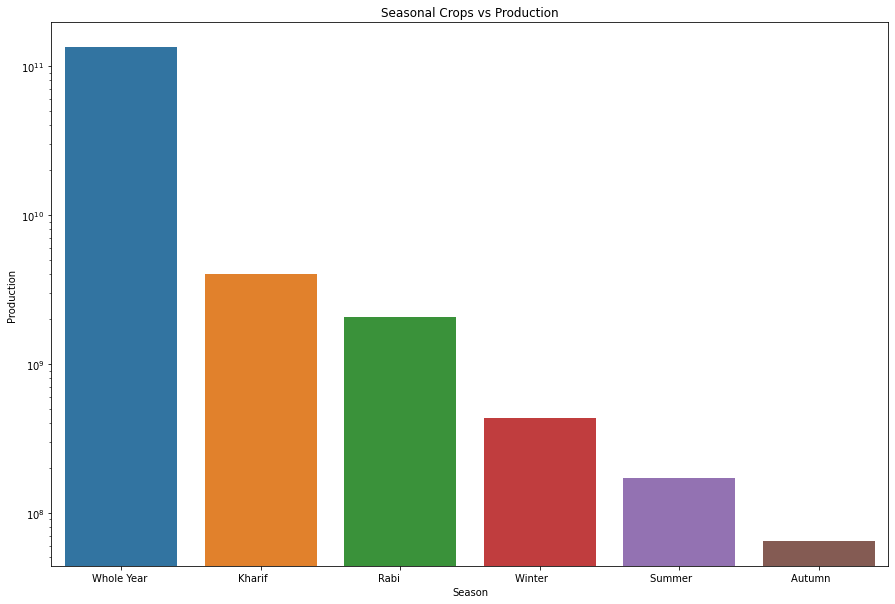

In [64]:
#Season wise Production Status:
#Season vs Production
data_season=data_explore.copy()
season = data_season.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
season
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(season.Season, season.Production,errwidth=0)
plt.yscale('log')
plt.title('Seasonal Crops vs Production')

Top crop categories which shows high production values are Whole Year(Annual growing plants), Kharif and Rabi crops. It clearly shows these crops heavily dependent on seasonal monsoons.

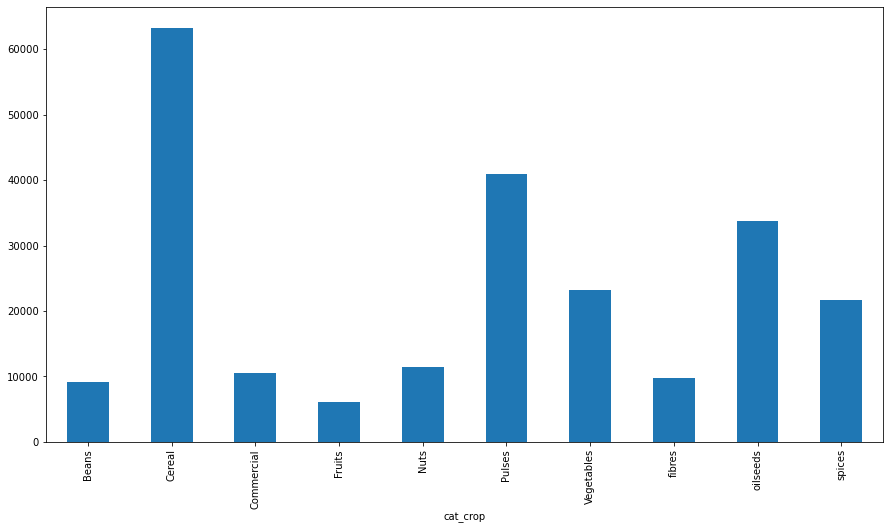

In [65]:
#Crop wise Production plot describing production values for all crop types.
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
data_explore.groupby("cat_crop")["Production"].agg("count").plot.bar()
plt.show()

Top crop categories are Cereal, Pulses and Oilseeds

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


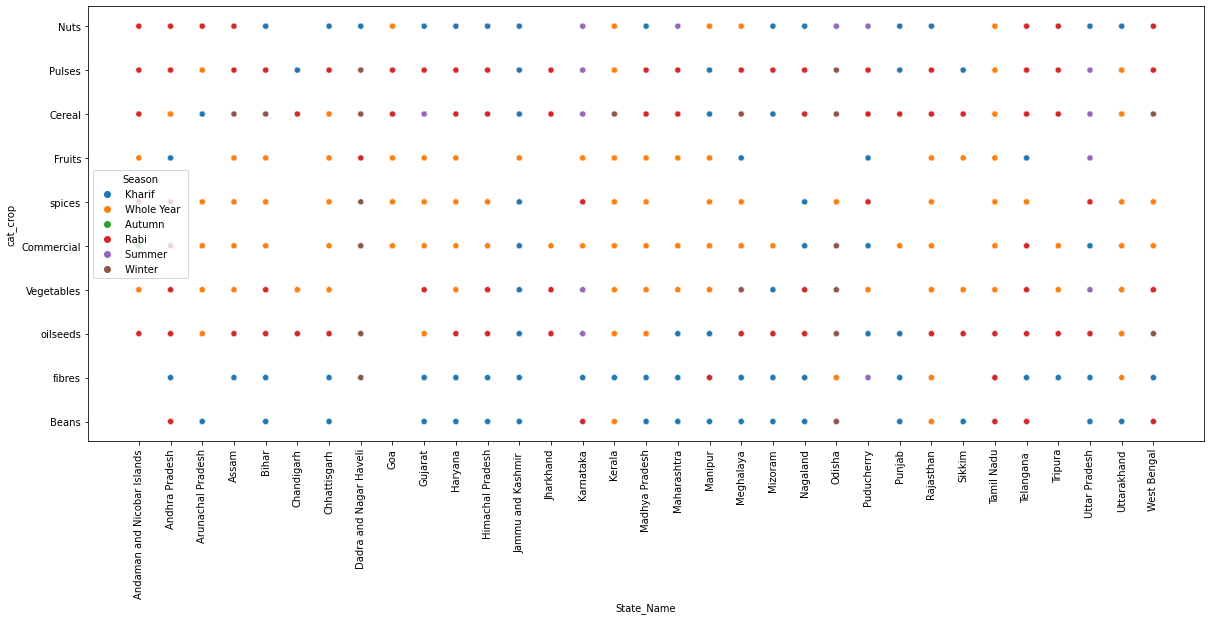

In [66]:
#State versus Crop Category versus Season plot
plt.figure(figsize=(20,8))
sns.scatterplot(data=data_explore,x="State_Name",y="cat_crop",hue="Season")
plt.xticks(rotation=90)
plt.show()

Insights
South zone: i. Top producing state Kerala shows a abundance of whole year seasonal crops
North Zone: ii. Top producing state Uttar Pradesh shows abundance of Kharif, Rabi and Summar crops

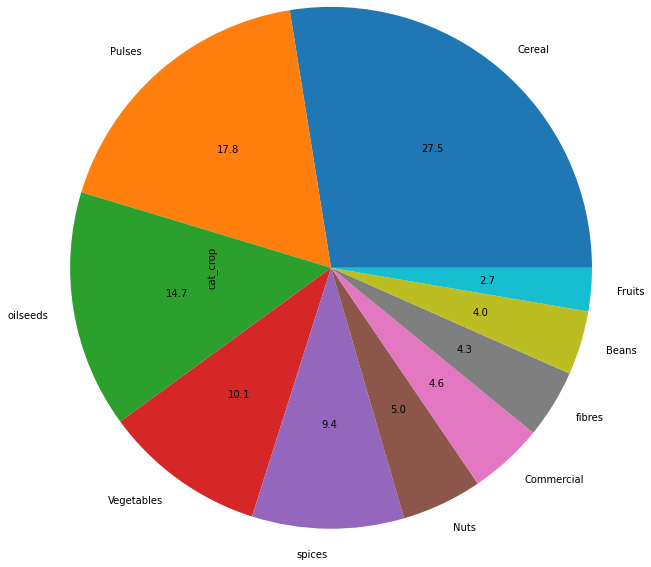

In [67]:
#Different proportion of Crop Categories for India
data1=data_explore["cat_crop"].value_counts()
data1.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

In [68]:
data_2 = pd.crosstab(data_explore['State_Name'], data_explore['cat_crop'])
data_2

cat_crop,Beans,Cereal,Commercial,Fruits,Nuts,Pulses,Vegetables,fibres,oilseeds,spices
State_Name,,,,,,,,,,
Andaman and Nicobar Islands,0,20,15,16,37,9,20,0,11,52
Andhra Pradesh,386,2264,474,502,674,1336,1046,333,1101,802
Arunachal Pradesh,26,1021,168,0,26,67,257,0,343,637
Assam,0,2952,854,920,400,2234,1781,1284,2097,1338
Bihar,280,6108,756,226,130,3731,1775,924,2504,1396
Chandigarh,0,39,0,0,0,14,26,0,7,0
Chhattisgarh,646,1805,316,264,261,2087,1143,535,1496,1288
Dadra and Nagar Haveli,0,116,12,9,9,64,0,13,30,1
Goa,0,62,22,16,47,32,0,0,0,12


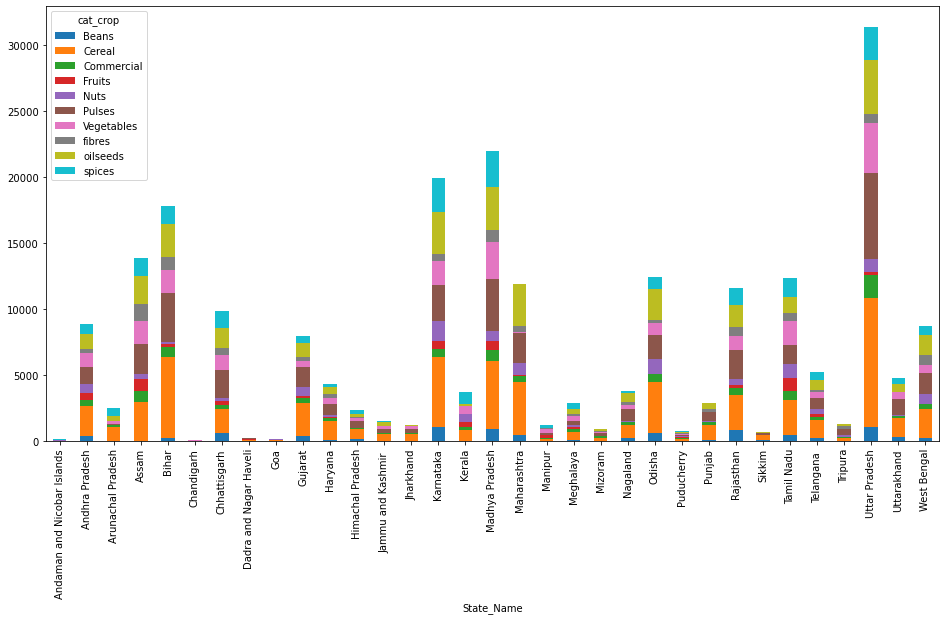

In [69]:
data_2.plot(kind='bar', stacked=True, figsize = (16,8));

Uttar Pradesh is topping in producing more crop categories than any other Indian state.

In [72]:
data_explore["Crop"].value_counts()[:5]

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Name: Crop, dtype: int64

In [73]:
rice_data = data_explore[data_explore["Crop"]=="Rice"]
print(rice_data.shape)
rice_data[:3]

(15082, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00,Union Terr,Cereal
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.00,Union Terr,Cereal
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84,Union Terr,Cereal


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


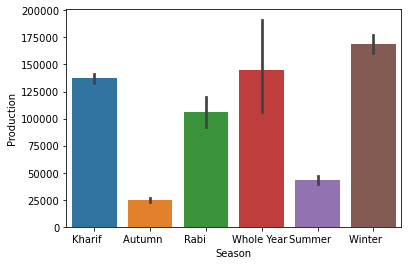

In [74]:
sns.barplot("Season","Production",data=rice_data);

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


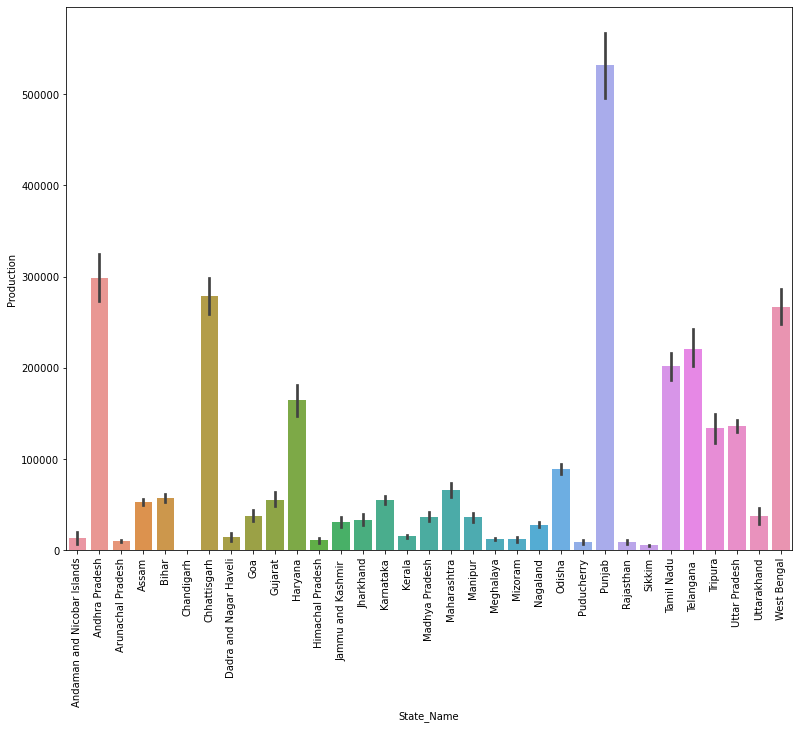

In [75]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=rice_data)
plt.xticks(rotation=90)
plt.show()

In [76]:
top_rice_pro_dis = rice_data.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:10]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:10]

,District_Name,Production,precent_of_pro
58,BARDHAMAN,34239976.0,2.132707
374,MEDINIPUR WEST,29192719.0,1.818328
612,WEST GODAVARI,27845309.0,1.734402
169,EAST GODAVARI,24690929.0,1.537925
494,SANGRUR,24448000.0,1.522794
325,KRISHNA,20280606.0,1.263219
90,BIRBHUM,19753571.0,1.230391
347,LUDHIANA,18950000.0,1.180339
386,MURSHIDABAD,18403217.0,1.146282
214,GUNTUR,18245831.0,1.136479


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


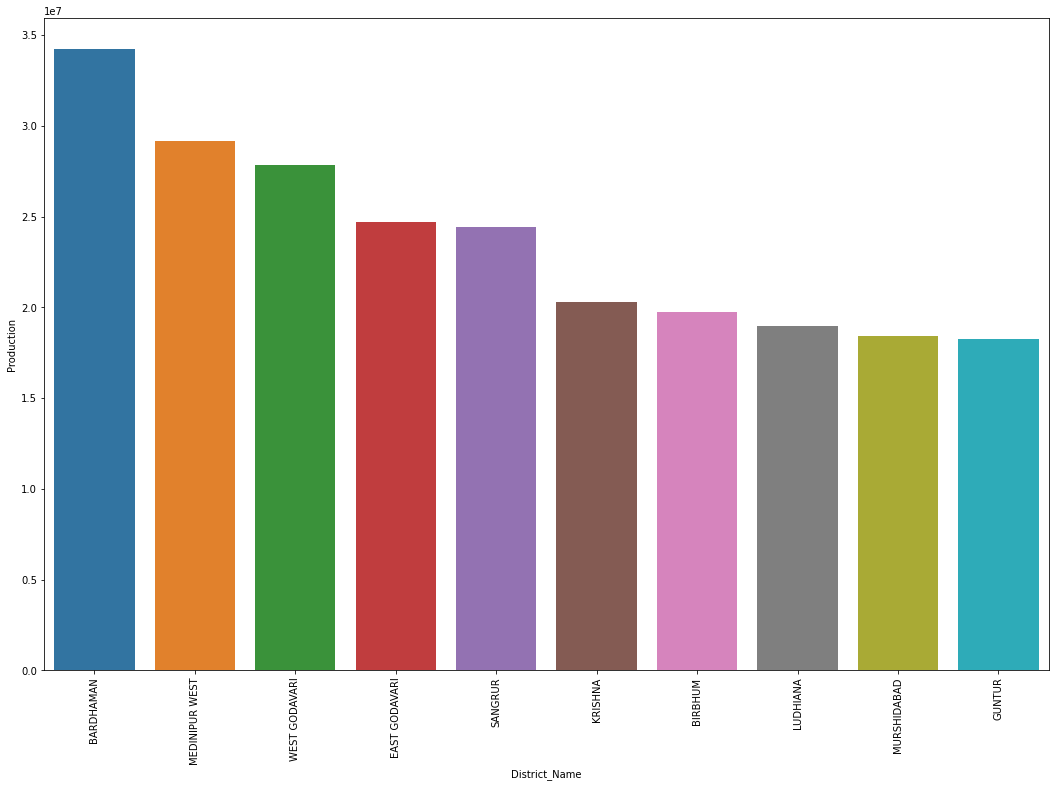

In [77]:
plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_rice_pro_dis[:10])
plt.xticks(rotation=90)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


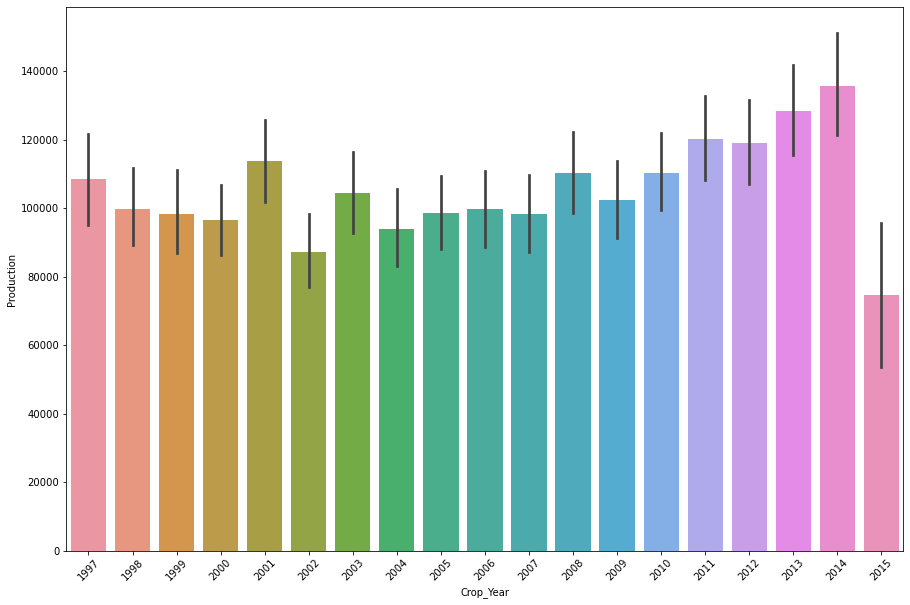

In [78]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=rice_data)
plt.xticks(rotation=45)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


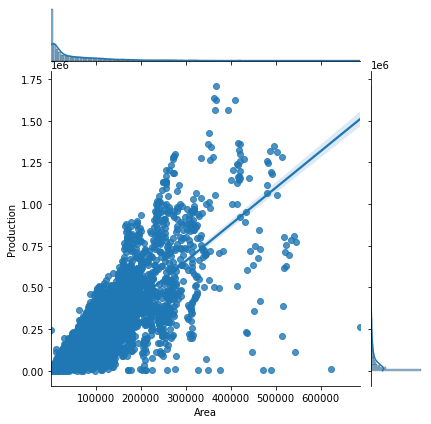

In [79]:
sns.jointplot("Area","Production",data=rice_data,kind="reg")

Year wise 2014 is the year when production reached the peak production
Correlation between Area and Production shows high production is directly proportional to Area under cultivation.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,State_Name,Area
30,Uttar Pradesh,4.336223e+08
16,Madhya Pradesh,3.297913e+08
17,Maharashtra,3.221860e+08
25,Rajasthan,2.687882e+08
32,West Bengal,2.154030e+08
14,Karnataka,2.029086e+08
9,Gujarat,1.549261e+08
1,Andhra Pradesh,1.315073e+08
4,Bihar,1.282695e+08
24,Punjab,1.267152e+08


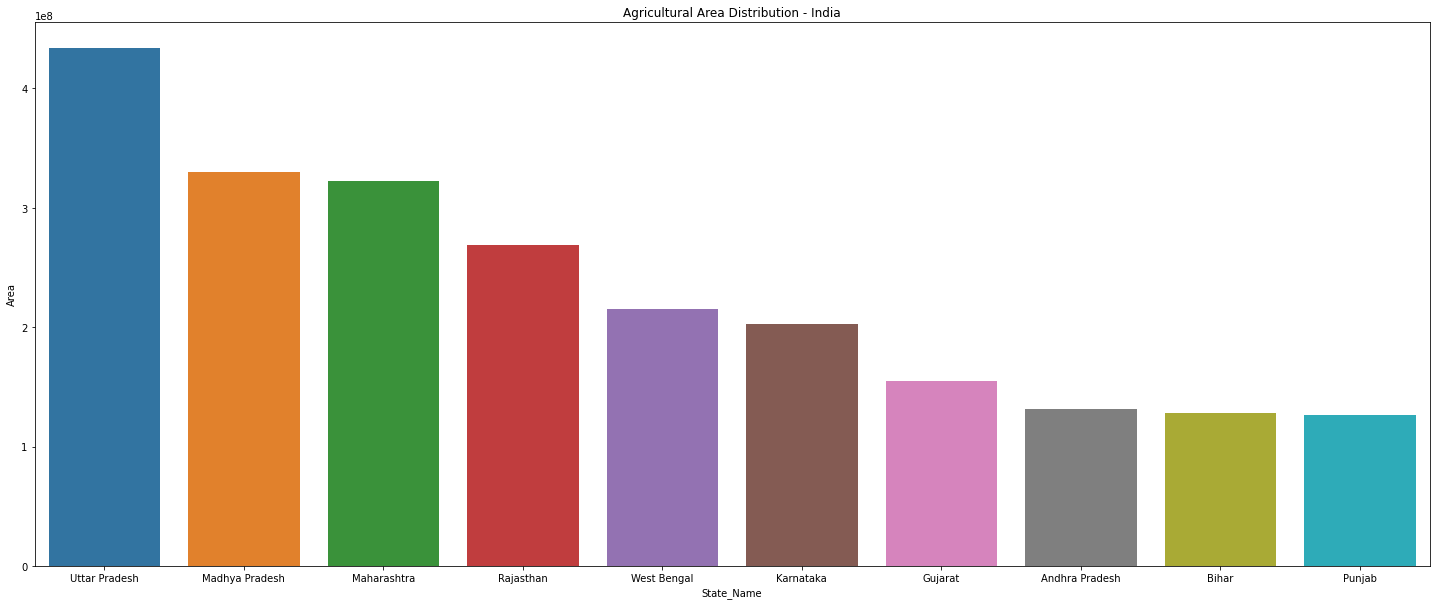

In [82]:
data = data_explore.groupby(by='State_Name')['Area'].sum().reset_index().sort_values(by='Area', ascending=False)
data.head()

fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(data.State_Name.head(10), data.Area.head(10), errwidth=0)
plt.title('Agricultural Area Distribution - India')
data.head(10)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\l

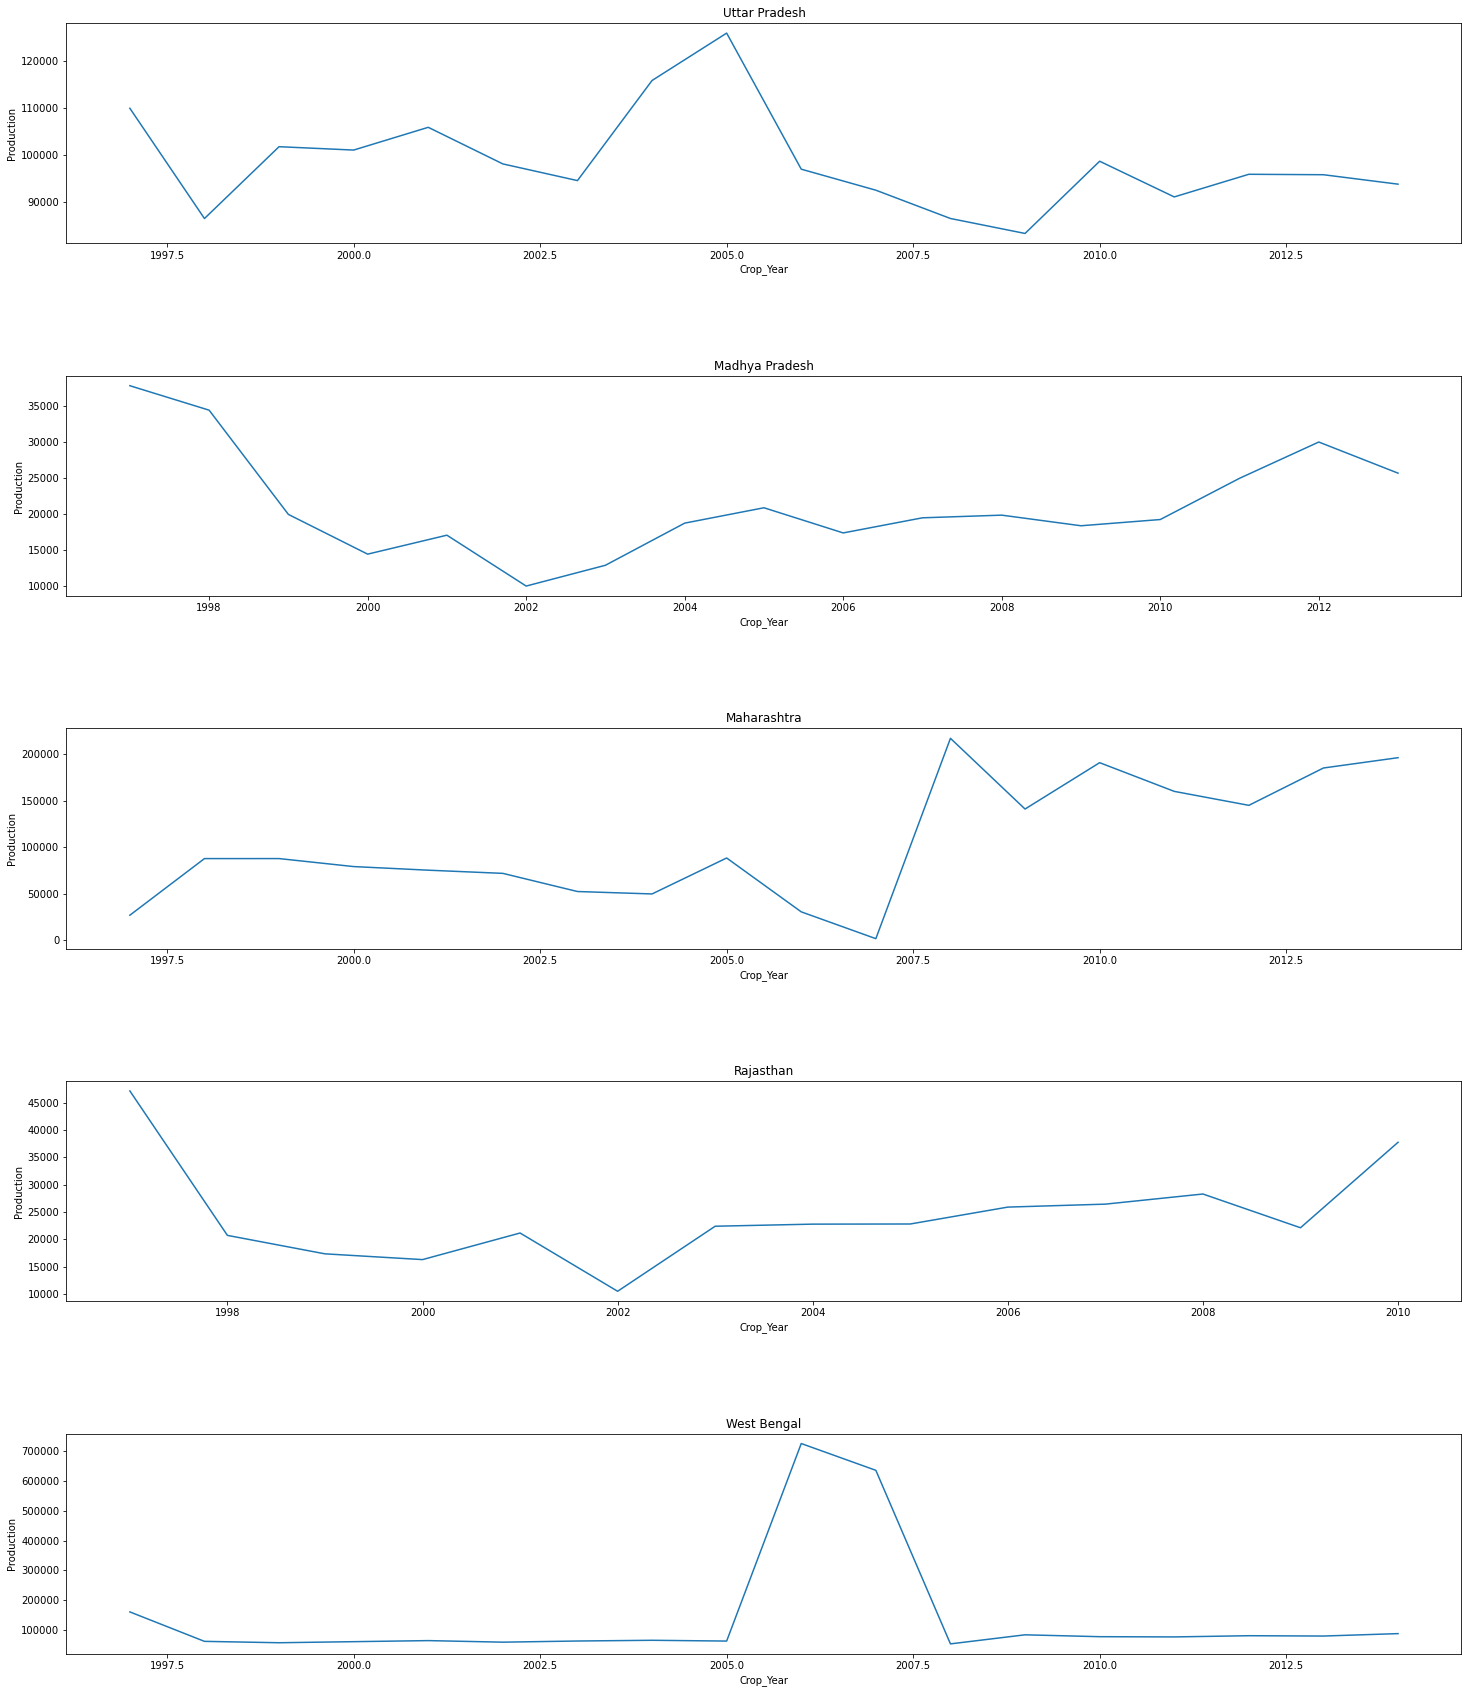

In [85]:
data = data_explore.groupby(by='State_Name')['Area'].sum().reset_index().sort_values(by='Area', ascending=False)
data = data.head(5)

fig, ax = plt.subplots(figsize=(25,30), sharey='col')
count = 1

for state in data.State_Name.unique():
    plt.subplot(len(data.State_Name.unique()),1,count)
    sns.lineplot(data_explore[data_explore.State_Name==state]['Crop_Year'],data_explore[data_explore.State_Name==state]['Production'], ci=None)
    plt.subplots_adjust(hspace=0.6)
    plt.title(state)
    count+=1;

a. Uttar Pradesh: High Production was seen in 2005 and after that it’s been reducing gradually.
b. Madhya Pradesh:1998 showed a high production and then there was gradual reduction but it picked up and 2012 also showed a    peak in Production
c. Maharashtra:Production went down drastically in 2006 and again the levels went up and hit a high peak after 2007
d. Rajasthan: the production hit a all time low in the year 2002 and then picked up by 2010
e. West Bengal:the production hit a peak around 2006 but it has hit a low after 2007 and never recovered back.

In [86]:
data_explore.Zones.value_counts()

South Zone      53500
North Zone      49874
East Zone       43261
West Zone       33134
Central Zone    32972
NE Zone         28284
Union Terr       1336
Name: Zones, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,State_Name,Production
5,Uttar Pradesh,3.234493e+09
4,Punjab,5.863850e+08
1,Haryana,3.812739e+08
6,Uttarakhand,1.321774e+08
2,Himachal Pradesh,1.780517e+07
3,Jammu and Kashmir,1.329102e+07
0,Chandigarh,6.395650e+04


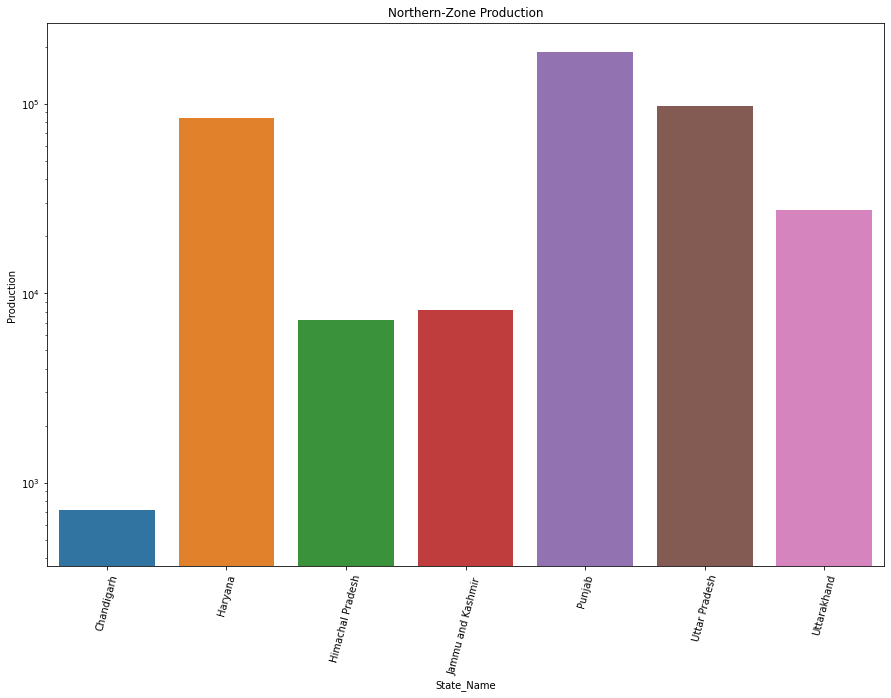

In [87]:
North_zone =  data_explore[(data_explore["Zones"] == 'North Zone')]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(North_zone.State_Name, North_zone.Production,errwidth=0)
plt.xticks(rotation=75);
plt.yscale('log')
plt.title('Northern-Zone Production')

North_zone.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'North Zone Crops vs Production')

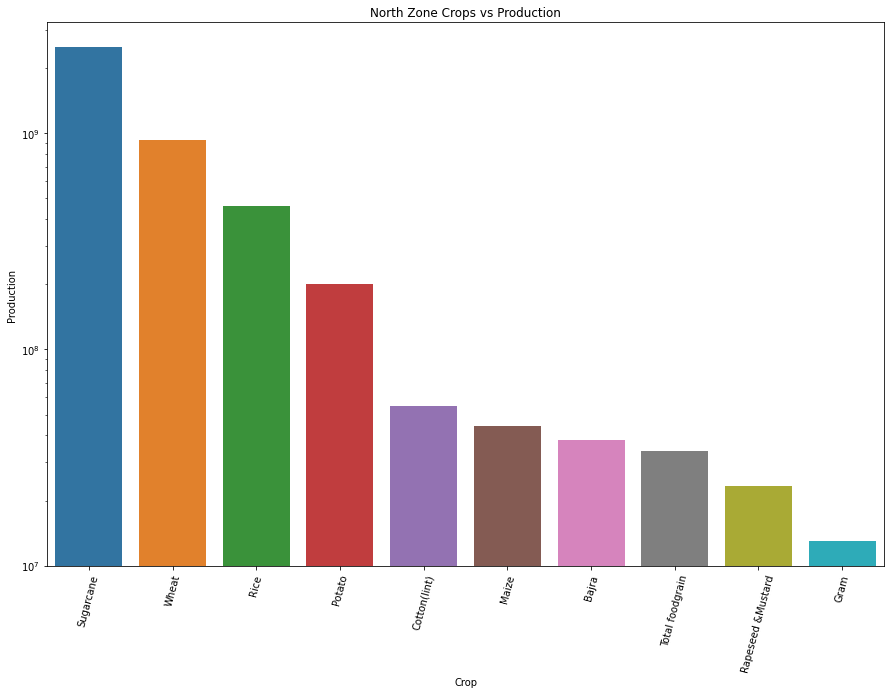

In [88]:
data3 = North_zone.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data3.Crop, data3.Production,errwidth=0)
plt.xticks(rotation=75);
plt.yscale('log')
plt.title('North Zone Crops vs Production')

 Top crops of these states are:
Sugarcane,
Wheat and
Rice

In [90]:
coc_data = data_explore[data_explore["Crop"]=="Coconut "]
print(coc_data.shape)
coc_data[:3]

(1958, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,Union Terr,None
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0,Union Terr,None
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.0,67490000.0,Union Terr,None


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Production'>

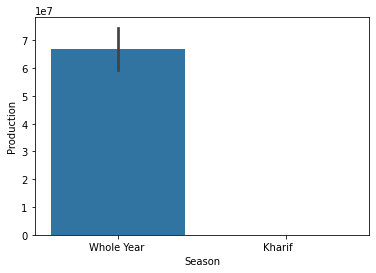

In [91]:
sns.barplot("Season","Production",data=coc_data)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


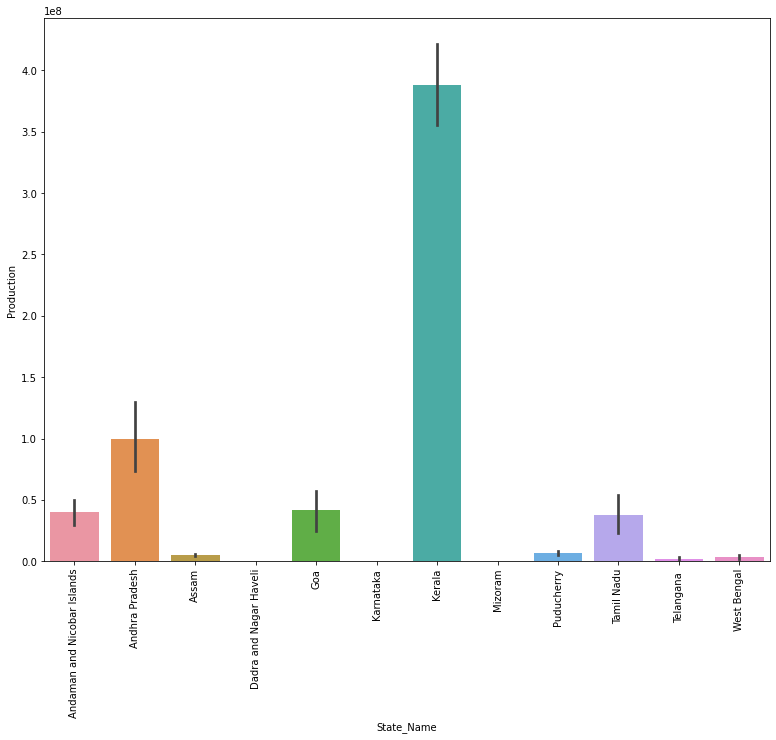

In [92]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=coc_data)
plt.xticks(rotation=90)
plt.show()

In [93]:
top_coc_pro_dis = coc_data.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

,District_Name,Production,precent_of_pro
77,KOZHIKODE,1.527871e+10,11.754512
86,MALAPPURAM,1.451252e+10,11.165052
129,THIRUVANANTHAPURAM,1.001337e+10,7.703678
131,THRISSUR,9.920739e+09,7.632416
64,KANNUR,9.780310e+09,7.524379


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


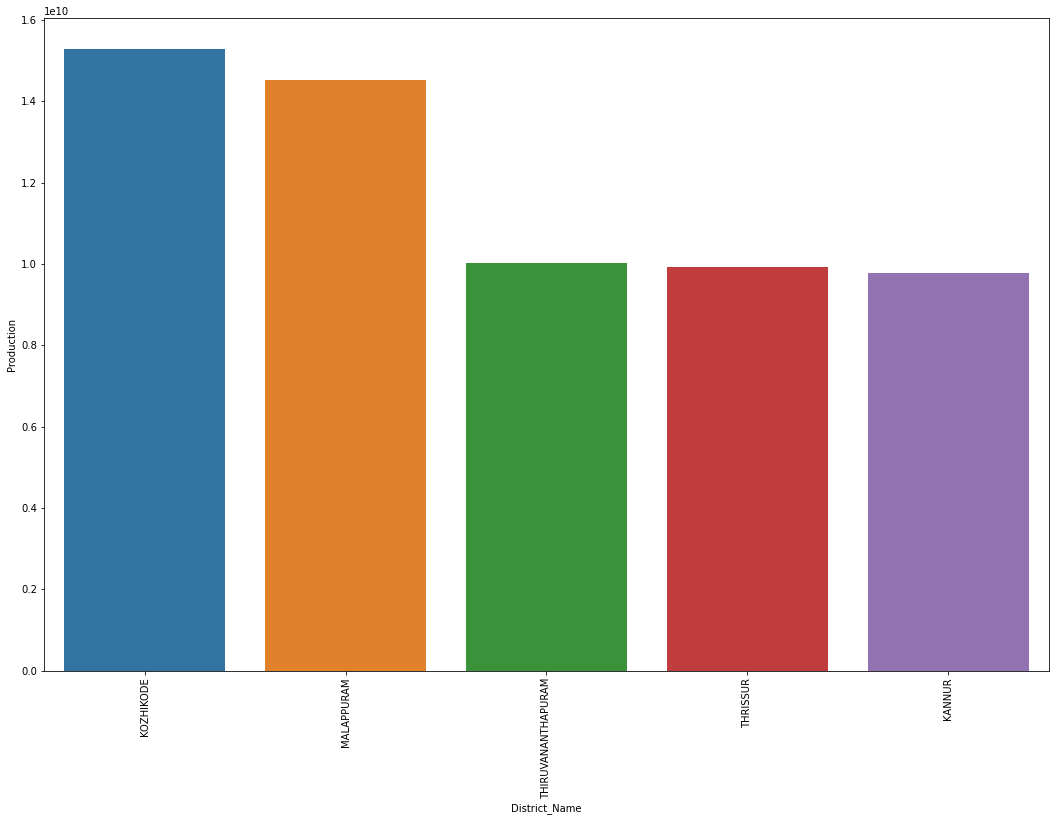

In [94]:
plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_coc_pro_dis[:5])
plt.xticks(rotation=90)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


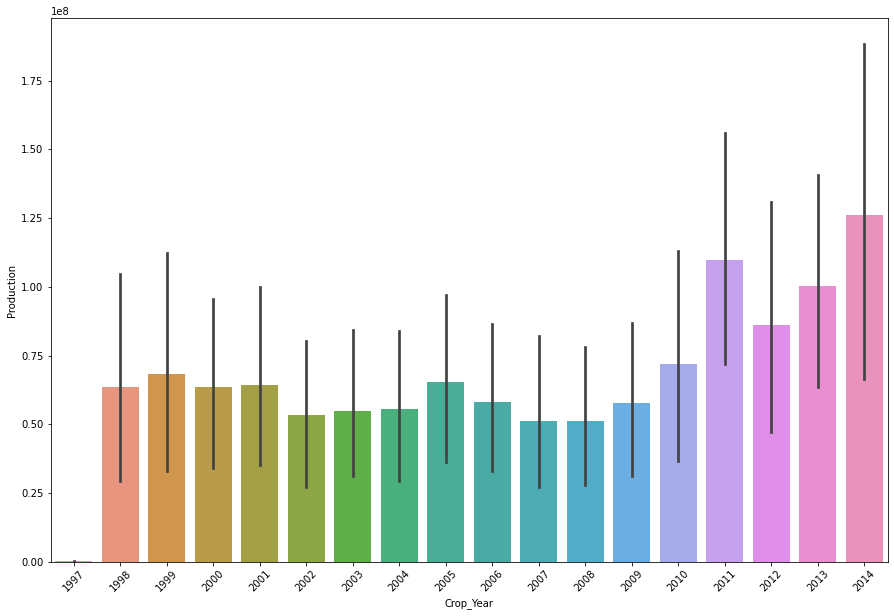

In [95]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=coc_data)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


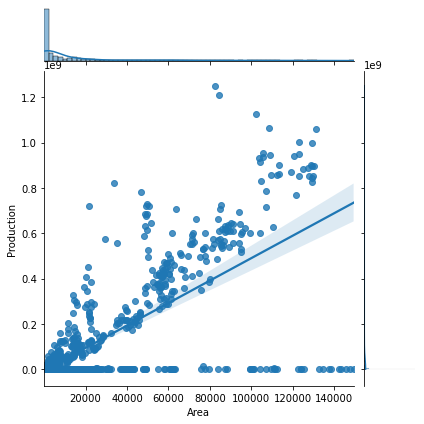

In [97]:
sns.jointplot("Area","Production",data=coc_data,kind="reg")

#Coconut cultivation is yearlong and doesn’t get restricted to any particular seasons
#Top states involved in coconut production are: Kerala, Andhra Pradesh and Tamil Nadu
#Top districts featuring in coconut production is KOZHIKODE(11.75%), MALAPPURAM(11.16%) and THIRUVANANTHAPURAM(7.7%)
#Year wise coconut cultivation is strong and its increasing healthy
#High coconut cultivation is directly proportional to area under cultivation.
